# Lab 2: Seven Stages of Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display

In [3]:
# 1. Acquire
# 2. Parse
# 3. Filter
# 4. Mine
# 5. Represent
# 6. Refine
# 7. Interact


1. Acquire
Dataset: Netflix Movies and TV Shows
Format: CSV
Why it's relevant?: 
The dataset contains information about Tv shows and movies available on Netflix. It is ideal for exploring patterns in content distribution, ratings, durations, and more.

In this project, a CSV file (netflix_titles.csv) containing information on Netflix's movies and TV shows, such as title, type, country, release year, and description has been loaded.

In [4]:
df = pd.read_csv("netflix_titles.csv")

2. Parse
Loaded the dataset using pandas.

Converted to a structured DataFrame.

Converted date fields, handled missing values (e.g., filled unknown directors), and extracted numeric values from text columns like duration to make the dataset usable.




In [5]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['description'].fillna('', inplace=True)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

df


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_10400\3263584721.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10400\3263584721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10400\3263584721.py:3: FutureWarning: A value i

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0


3. Filter

 In this step, the dataset has been filtered to include only movies released after 2010 with valid duration values. This narrowed the analysis to recent, meaningful data.

In [6]:
movies_df = df[(df['type'] == 'Movie') & (df['release_year'] > 2010) & (df['duration_num'].notnull())]
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Unknown,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,94.0
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France",2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,98.0
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,131.0
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0


4. Mine
Goal is to identify patterns and insights
Explored the most frequent countries producing content, common ratings, and calculated average movie durations by rating to find trends and relationships.

In [7]:
top_countries = movies_df['country'].value_counts().head(5)
top_ratings = movies_df['rating'].value_counts().head(5)
duration_stats = movies_df.groupby('rating')['duration_num'].mean().sort_values(ascending=False)
top_countries


country
United States     1547
India              621
Unknown            401
United Kingdom     182
Canada             113
Name: count, dtype: int64

In [8]:
top_ratings

rating
TV-MA    1890
TV-14    1110
R         523
TV-PG     433
PG-13     251
Name: count, dtype: int64

In [9]:
duration_stats

rating
NC-17       125.000000
TV-14       105.424324
PG-13       105.119522
R           104.300191
UR          103.000000
TV-MA        95.382011
PG           95.171779
NR           94.183333
TV-PG        89.623557
G            80.181818
TV-G         77.864407
Unknown      76.000000
TV-Y7-FV     68.400000
TV-Y7        66.333333
TV-Y         47.642857
Name: duration_num, dtype: float64

5. Represent and Refine

The goal is to visualize the data and improve the clarity and effectiveness
Bar plots and a word cloud has been used to represent the data visually—highlighting top countries, ratings, and duration insights. These help readers easily grasp the patterns.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10400\1214233649.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
C:\Users\DELL\AppData\Local\Temp\ipykernel_10400\1214233649.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette="magma")
C:\Users\DELL\AppData\Local\Temp\ipykernel_10400\1214233649.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_stats.head(5).values, y=duration_stats.head(5).index, palette="coolwarm"

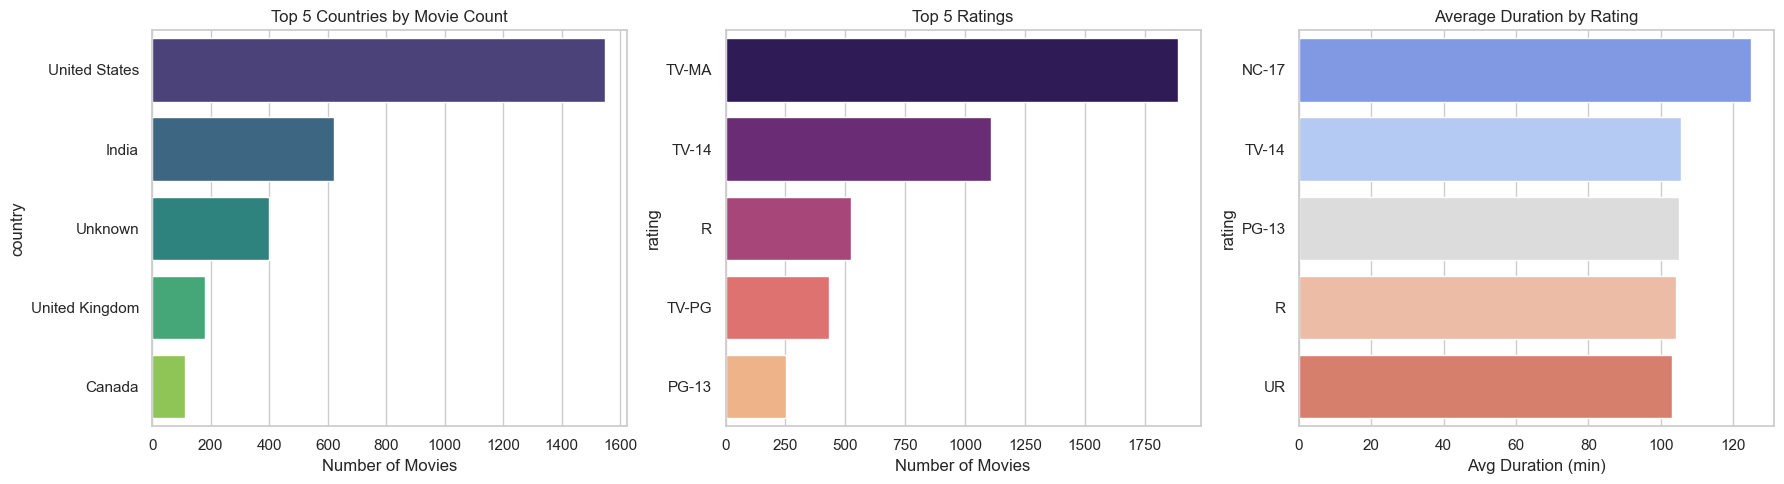

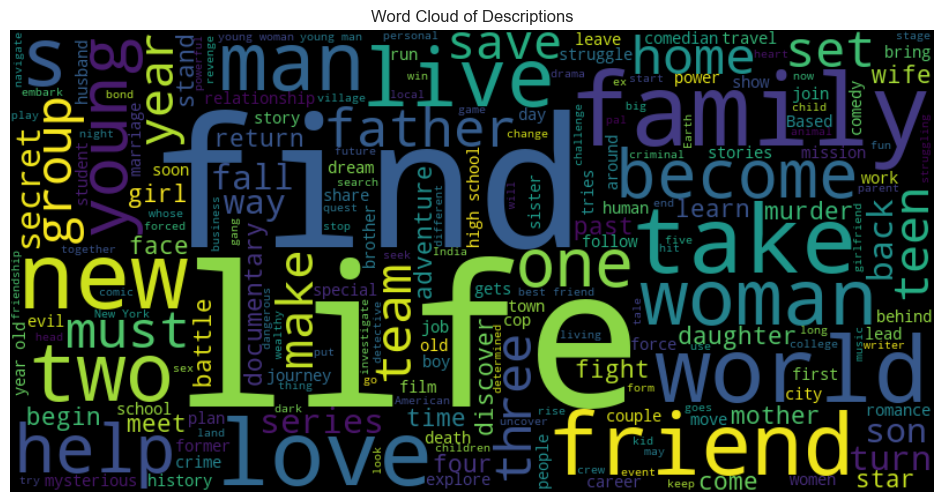

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Plot 1: Top Countries
plt.subplot(1, 3, 1)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 5 Countries by Movie Count")
plt.xlabel("Number of Movies")

# Plot 2: Top Ratings
plt.subplot(1, 3, 2)
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette="magma")
plt.title("Top 5 Ratings")
plt.xlabel("Number of Movies")

# Plot 3: Duration by Rating
plt.subplot(1, 3, 3)
sns.barplot(x=duration_stats.head(5).values, y=duration_stats.head(5).index, palette="coolwarm")
plt.title("Average Duration by Rating")
plt.xlabel("Avg Duration (min)")

plt.tight_layout()
plt.show()

# 🎨 Custom Visualization: Word Cloud
text = " ".join(df['description'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Descriptions")
plt.show()

6. Interact


In [11]:
def filter_by_country(country):
    filtered = df[df['country'].str.contains(country, na=False)]
    sns.countplot(data=filtered, x='type', palette='Set2')
    plt.title(f"Content Types from {country}")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.show()

country_widget = widgets.Text(
    value='India',
    placeholder='Enter a country',
    description='Country:',
    disabled=False
)

widgets.interact(filter_by_country, country=country_widget)

interactive(children=(Text(value='India', description='Country:', placeholder='Enter a country'), Output()), _…

<function __main__.filter_by_country(country)>